# Advanced Features of HydroPy

In [1]:
# Import the libraries that we'll be using
import numpy as np
import pandas as pd
import hydropy as hp

# Set the notebook to plot graphs in the output cells.
%matplotlib inline

In [33]:
# Create a Pandas dataframe using the USGS daily discharge for Herring Run.
start = '2011-01-01'
end = '2016-01-01'
herring = hp.get_usgs('01585200', 'dv', start, end)
stony = hp.get_usgs('01589464', 'dv', start, end)

## Create a timeseries and calculate baseflow

In [34]:
s = pd.TimeSeries(stony['value'], name='StonyRun')
#type(stony)
# s.dtypes
s.head()

C:\Users\Marty\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: TimeSeries is deprecated. Please use Series
  if __name__ == '__main__':


datetime
2011-01-01    0.53
2011-01-02    0.65
2011-01-03    0.53
2011-01-04    0.54
2011-01-05    0.53
Name: StonyRun, dtype: float64

In [35]:
bf = hp.get_baseflow_chapman(s, 0.00001)
bf.head()

C:\Users\Marty\Google Drive\PyDev\src\hydropy\hydropy\baseflow.py:39: FutureWarning: TimeSeries is deprecated. Please use Series
  return pd.TimeSeries(baseflow, index=flowserie.index)


datetime
2011-01-01    0.000000
2011-01-02    0.324998
2011-01-03    0.265000
2011-01-04    0.270000
2011-01-05    0.265000
dtype: float64

In [36]:
stony.head()

,value
datetime,
2011-01-01,0.53
2011-01-02,0.65
2011-01-03,0.53
2011-01-04,0.54
2011-01-05,0.53


## Merge two dataframes

In [3]:
multi = pd.merge(herring, stony, left_index=True, right_index=True, suffixes=('_herring', '_stony'))
multi.head()

,value_herring,value_stony
datetime,,
2011-01-01,0.73,0.53
2011-01-02,0.89,0.65
2011-01-03,0.73,0.53
2011-01-04,0.72,0.54
2011-01-05,0.71,0.53


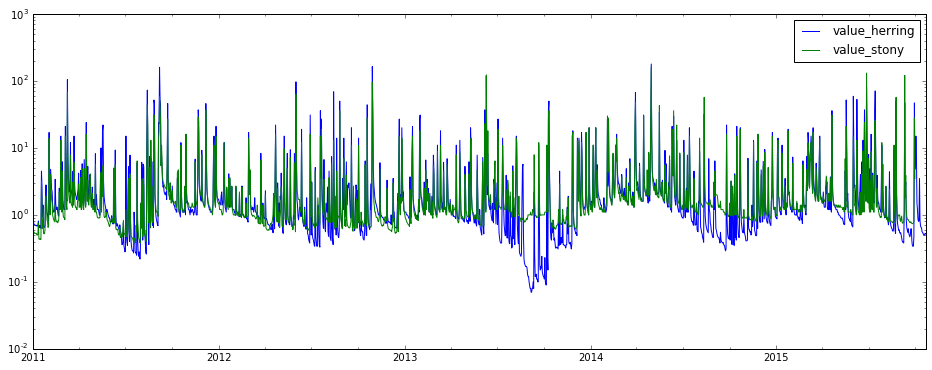

In [4]:
# Analyze the data using the HydroAnalysis class.
my_analysis = hp.HydroAnalysis(multi)

# Plot discharge on a logarithmic scale for the Y axis.
my_analysis.plot(figsize=(16,6), logy=True)

## Mark peak discharges

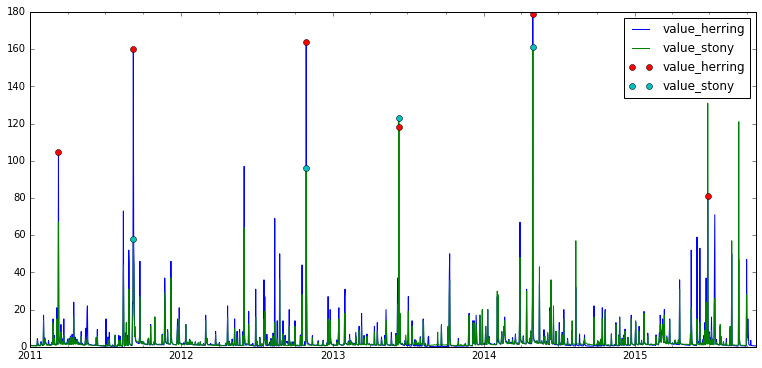

In [5]:
# We'll need to import pyplot to access the sub-plotfeature
import matplotlib.pyplot as plt

# Create a single figure with a single x-axis.
fig, ax = plt.subplots(figsize=(13, 6))

# Plot our data like normal, but use the special x-axis 'ax'.
my_analysis.plot(ax=ax)

# Plot a new column of data that only includes peaks that are in the 90th percentile;
# Plot the new column using filled circles, and use the axis 'ax' that we created.
my_analysis.get_highpeaks(150, above_percentile=0.9).plot(style='o', ax=ax)

## Seasonal Analysis

In [6]:
my_analysis.data.groupby('season').mean()

,value_herring,value_stony
season,,
Autumn,3.719325,3.301396
Spring,4.123326,3.264870
Summer,4.072242,3.559802
Winter,2.909482,2.566353


In [7]:
my_analysis.summary()

,value_herring,value_stony
count,1755.000000,1734.000000
mean,3.720598,3.179354
std,10.903775,8.778873
min,0.070000,0.380000
25%,0.740000,0.910000
50%,1.200000,1.200000
75%,2.200000,2.000000
max,179.000000,161.000000
